In [6]:
import nltk
from nltk.corpus import movie_reviews
import random
from wordcloud import WordCloud
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from nltk.classify import MaxentClassifier
from nltk.classify import ConditionalExponentialClassifier
from nltk import ConfusionMatrix
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
from nltk.metrics import ConfusionMatrix
import pandas as pd

random.seed(2133)

In [7]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [8]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words.keys())[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [9]:
extra_stopwords = {'movie','film','one','character'}
stop_words = set(stopwords.words('english')).union(extra_stopwords)

# Get all the words in the movie review dataset
words = movie_reviews.words()

# Remove the stopwords from the words
words_no_stopwords = [word.lower() for word in words if word.lower() not in stop_words]

# Create a word cloud with the filtered words
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(" ".join(words_no_stopwords))

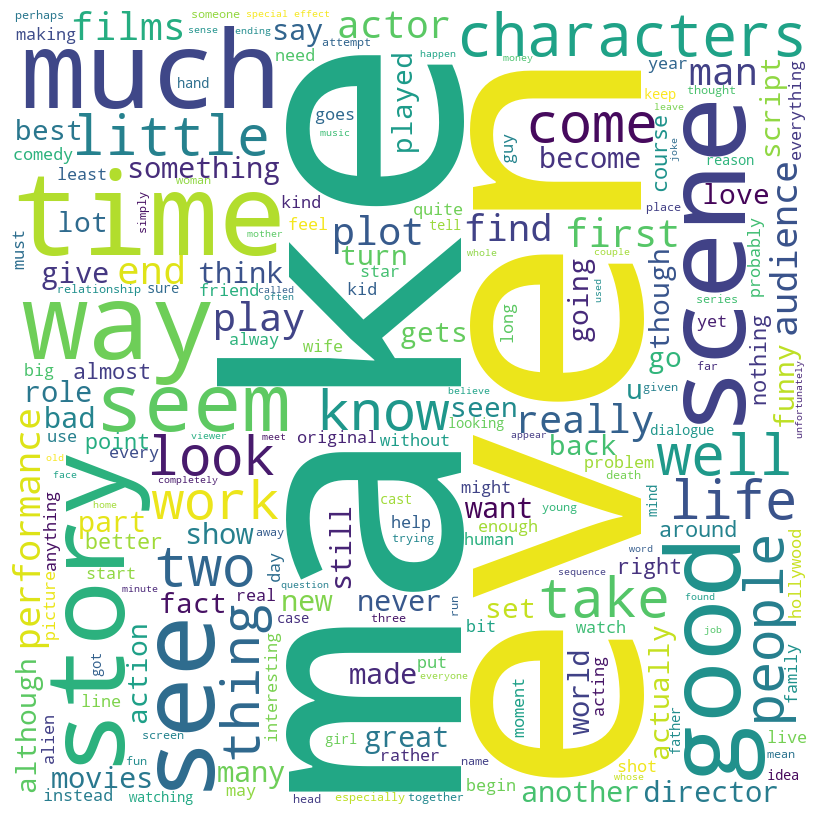

In [10]:
random.seed(2133)
# Create a word cloud with the filtered words
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(" ".join(words_no_stopwords))

# Display the word cloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [11]:
random.seed(2133)
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]

test_lab = [label for _, label in test_set]
print(test_lab)

['pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos']


In [12]:
#from sklearn.metrics import confusion_matrix

def measures(X, Y):
    #cm = ConfusionMatrix(X, Y)

    #TP = cm['pos', 'pos']
    #TN = cm['neg', 'neg']
    #FP = cm['neg', 'pos']
    #FN = cm['pos', 'neg']
    
    TN, FP, FN, TP = confusion_matrix(X, Y).ravel()
    # Sensitivity, Recall, Hit Rate, True Positive Rate (TPR)
    sensitivity = round(TP / (TP + FN), 2)
    
    # Specificity, True Negative Rate (TNR)
    specificity = round(TN / (TN + FP), 2)
    
    # Precision, Positive Predictive Value (PPV)
    precision = round(TP / (TP + FP), 2)
    
    # Negative Predictive Value (NPV)
    npv = round(TN / (TN + FN), 2)
    
    # F1 score
    f1_score = round(2 * precision * sensitivity / (precision + sensitivity), 2)
    
    # Accuracy
    accuracy = round((TP + TN) / (TP + TN + FP + FN), 2)
    
    # Kappa
    po = (TP + TN) / (TP + TN + FP + FN)
    pe = ((TP + FP) / (TP + TN + FP + FN)) * ((TP + FN) / (TP + TN + FP + FN)) + ((TN + FP) / (TP + TN + FP + FN)) * ((TN + FN) / (TP + TN + FP + FN))
    kappa = round((po - pe) / (1 - pe), 2)
    
    measures_dict = {
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'NPV': npv,
        'F1 score': f1_score,
        'Accuracy': accuracy,
        'Kappa': kappa
    }
    
    return measures_dict


# Naive Bayes Classifier

In [13]:
random.seed(2133)
nb_classifiers = nltk.NaiveBayesClassifier
nb_class = nb_classifiers.train(train_set)


In [14]:
# create a list of feature sets for the test data
test_features = [features for features, label in test_set]

# predict labels for the test set
nb_pred = nb_class.classify_many(test_features)

In [15]:
nb_measure = measures(test_lab, nb_pred)

# Maximum Entropy Classifier

In [16]:
random.seed(2133)
max_classifiers = nltk.MaxentClassifier
max_class = max_classifiers.train(train_set, 'GIS', trace=0, max_iter=10)

In [17]:
# predict labels for the test set
max_pred = [max_class.classify(features) for features, label in test_set]

In [18]:
max_measure = measures(test_lab, max_pred)

# Decision Tree Classifier

In [19]:
random.seed(2133)
dt_classifiers = SklearnClassifier(DecisionTreeClassifier())
dt_class = dt_classifiers.train(train_set)
dt_accu = nltk.classify.accuracy(dt_class, test_set)
print(f"Accuracy for {dt_class.__class__.__name__}: {dt_accu}")

Accuracy for SklearnClassifier: 0.64


In [20]:
dt_pred = [dt_class.classify(features) for features, label in test_set]

In [21]:
dt_measure = measures(test_lab, dt_pred)

# Logistic Classifier

In [22]:
random.seed(2133)
log_classifiers = SklearnClassifier(LogisticRegression())
log_class = log_classifiers.train(train_set)


c:\Users\malid\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
log_pred = [log_class.classify(features) for features, label in test_set]

In [24]:
log_measure = measures(test_lab, log_pred)

# SV Classifier

In [25]:
random.seed(2133)
svc_classifiers = SklearnClassifier(SVC())
svc_class = svc_classifiers.train(train_set)

In [26]:
svc_pred = [svc_class.classify(features) for features, label in test_set]

In [27]:
svc_measure = measures(test_lab, svc_pred)

# KNN Classifier

In [28]:
random.seed(2133)
knn_classifiers = SklearnClassifier(KNeighborsClassifier())
knn_class = knn_classifiers.train(train_set)


In [29]:
knn_pred = [knn_class.classify(features) for features, label in test_set]

In [30]:
knn_measure = measures(test_lab, knn_pred)

# Random Forest Classifier

In [31]:
random.seed(2133)
rf_classifiers = SklearnClassifier(RandomForestClassifier())
rf_class = rf_classifiers.train(train_set)

In [32]:
rf_pred = [rf_class.classify(features) for features, label in test_set]

In [33]:
rf_measure = measures(test_lab, rf_pred)

# Comparision

In [34]:
list_of_dicts = [nb_measure, max_measure, dt_measure, log_measure, svc_measure, knn_measure, rf_measure]

# Create a dataframe from the list of dictionaries
df = pd.DataFrame(list_of_dicts)

df = df.rename(index={0: "Naive Baye's Classifier", 1: 'Max Entropy Classifier',2: 'Decision Tree Classifier', 3: 'Logistic Classifier', 4: 'SV-Classifier', 5: 'KNN Classifier', 6: 'Random Forest Classifier'})
# Print the dataframe
print(df)

                          Sensitivity  Specificity  Precision   NPV  F1 score  \
Naive Baye's Classifier          0.73         0.88       0.86  0.75      0.79   
Max Entropy Classifier           0.71         0.90       0.88  0.75      0.79   
Decision Tree Classifier         0.65         0.63       0.65  0.63      0.65   
Logistic Classifier              0.76         0.84       0.83  0.77      0.79   
SV-Classifier                    0.76         0.84       0.83  0.77      0.79   
KNN Classifier                   0.80         0.49       0.62  0.71      0.70   
Random Forest Classifier         0.75         0.84       0.83  0.76      0.79   

                          Accuracy  Kappa  
Naive Baye's Classifier       0.80   0.60  
Max Entropy Classifier        0.80   0.60  
Decision Tree Classifier      0.64   0.28  
Logistic Classifier           0.80   0.60  
SV-Classifier                 0.80   0.60  
KNN Classifier                0.65   0.30  
Random Forest Classifier      0.79   0.58  

# After Comapiring Accuracy, Precision and F1 Score we will prefer Naive Baye's Classifier and Max Entropy Classifier  

In [35]:
print(ConfusionMatrix(test_lab, nb_pred))
print("================================")
print(ConfusionMatrix(test_lab, max_pred))

    |  n  p |
    |  e  o |
    |  g  s |
----+-------+
neg |<43> 6 |
pos | 14<37>|
----+-------+
(row = reference; col = test)

    |  n  p |
    |  e  o |
    |  g  s |
----+-------+
neg |<44> 5 |
pos | 15<36>|
----+-------+
(row = reference; col = test)



In [36]:
nb_class.show_most_informative_features(30)


Most Informative Features
    contains(schumacher) = True              neg : pos    =     11.6 : 1.0
        contains(shoddy) = True              neg : pos    =      7.0 : 1.0
 contains(unimaginative) = True              neg : pos    =      7.0 : 1.0
       contains(singers) = True              pos : neg    =      6.3 : 1.0
          contains(mena) = True              neg : pos    =      6.3 : 1.0
        contains(suvari) = True              neg : pos    =      6.3 : 1.0
        contains(turkey) = True              neg : pos    =      6.3 : 1.0
         contains(kudos) = True              pos : neg    =      6.2 : 1.0
     contains(atrocious) = True              neg : pos    =      5.8 : 1.0
        contains(justin) = True              neg : pos    =      5.8 : 1.0
           contains(ugh) = True              neg : pos    =      5.8 : 1.0
       contains(unravel) = True              pos : neg    =      5.7 : 1.0
       contains(bronson) = True              neg : pos    =      5.7 : 1.0

In [37]:
nb_words = ['schumacher', 'shoddy', 'unimaginative', 'singers', 'mena', 'suvari', 'turkey', 'kudos', 'atrocious', 'justin', 'ugh', 'unravel', 'bronson', 'canyon', 'poorly', 'wasted', 'awful', 'surveillance', 'underwood', 'ridiculous', 'waste', 'uninspired', 'unfunny', 'martian', 'sexist', 'everyday', 'stretched', 'explores', 'seymour', 'banality']
nb_weights = [11.6, 7.0, 7.0, 6.3, 6.3, 6.3, 6.3, 6.2, 5.8, 5.8, 5.8, 5.7, 5.7, 5.7, 5.6, 5.2, 5.0, 5.0, 5.0, 4.9, 4.8, 4.7, 4.6, 4.6, 4.6, 4.5, 4.4, 4.3, 4.3, 4.3]
nb_labs = ['neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg']


In [38]:
max_class.show_most_informative_features(30)

  -0.014 contains(schumacher)==True and label is 'pos'
  -0.011 contains(unimaginative)==True and label is 'pos'
  -0.011 contains(shoddy)==True and label is 'pos'
  -0.010 contains(singers)==True and label is 'neg'
  -0.010 contains(mena)==True and label is 'pos'
  -0.010 contains(suvari)==True and label is 'pos'
  -0.010 contains(bronson)==True and label is 'pos'
  -0.010 contains(canyon)==True and label is 'pos'
  -0.010 contains(unravel)==True and label is 'neg'
  -0.009 contains(kudos)==True and label is 'neg'
  -0.009 contains(underwood)==True and label is 'pos'
  -0.009 contains(turkey)==True and label is 'pos'
  -0.009 contains(justin)==True and label is 'pos'
  -0.009 contains(atrocious)==True and label is 'pos'
  -0.009 contains(ugh)==True and label is 'pos'
  -0.009 contains(surveillance)==True and label is 'pos'
  -0.008 contains(runtime)==True and label is 'pos'
  -0.008 contains(savages)==True and label is 'pos'
  -0.008 contains(banality)==True and label is 'pos'
  -0.00

In [39]:
max_weights = [-0.014, -0.011, -0.011, -0.010, -0.010, -0.010, -0.010, -0.010, -0.010, -0.009, -0.009, -0.009, -0.009, -0.009, -0.009, -0.009, -0.008, -0.008, -0.008, -0.008, -0.008, -0.008, -0.008, -0.008, -0.007, -0.007, -0.007, -0.007, -0.007, -0.007]
max_words = ['schumacher', 'unimaginative', 'shoddy', 'singers', 'mena', 'suvari', 'bronson', 'canyon', 'unravel', 'kudos', 'underwood', 'turkey', 'justin', 'atrocious', 'ugh', 'surveillance', 'runtime', 'savages', 'banality', 'seymour', 'oops', 'poorly', 'sexist', 'martian', 'wasted', 'awful', 'lena', 'fourteen', 'brooke', 'unimpressive']
max_labs = ['pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos']


In [40]:
confusion_matrix(max_labs, nb_labs)

array([[ 3,  2],
       [21,  4]], dtype=int64)

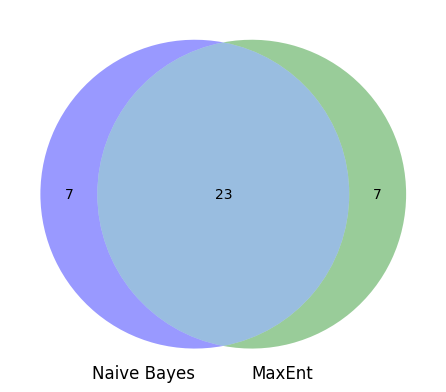

In [41]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

nb_set = set(nb_words)
max_set = set(max_words)

venn2([nb_set, max_set], set_colors=('blue', 'green'), set_labels=('Naive Bayes', 'MaxEnt'))

plt.show()


In [42]:
words = nb_words
weights = [abs(x) for x in nb_weights] 

nb_word_weights = {word: weight for word, weight in zip(words, weights)}

print(nb_word_weights)


words = max_words
weights = [abs(x) for x in max_weights] 


max_word_weights = {word: weight for word, weight in zip(words, weights)}

print(max_word_weights)


{'schumacher': 11.6, 'shoddy': 7.0, 'unimaginative': 7.0, 'singers': 6.3, 'mena': 6.3, 'suvari': 6.3, 'turkey': 6.3, 'kudos': 6.2, 'atrocious': 5.8, 'justin': 5.8, 'ugh': 5.8, 'unravel': 5.7, 'bronson': 5.7, 'canyon': 5.7, 'poorly': 5.6, 'wasted': 5.2, 'awful': 5.0, 'surveillance': 5.0, 'underwood': 5.0, 'ridiculous': 4.9, 'waste': 4.8, 'uninspired': 4.7, 'unfunny': 4.6, 'martian': 4.6, 'sexist': 4.6, 'everyday': 4.5, 'stretched': 4.4, 'explores': 4.3, 'seymour': 4.3, 'banality': 4.3}
{'schumacher': 0.014, 'unimaginative': 0.011, 'shoddy': 0.011, 'singers': 0.01, 'mena': 0.01, 'suvari': 0.01, 'bronson': 0.01, 'canyon': 0.01, 'unravel': 0.01, 'kudos': 0.009, 'underwood': 0.009, 'turkey': 0.009, 'justin': 0.009, 'atrocious': 0.009, 'ugh': 0.009, 'surveillance': 0.009, 'runtime': 0.008, 'savages': 0.008, 'banality': 0.008, 'seymour': 0.008, 'oops': 0.008, 'poorly': 0.008, 'sexist': 0.008, 'martian': 0.008, 'wasted': 0.007, 'awful': 0.007, 'lena': 0.007, 'fourteen': 0.007, 'brooke': 0.007,

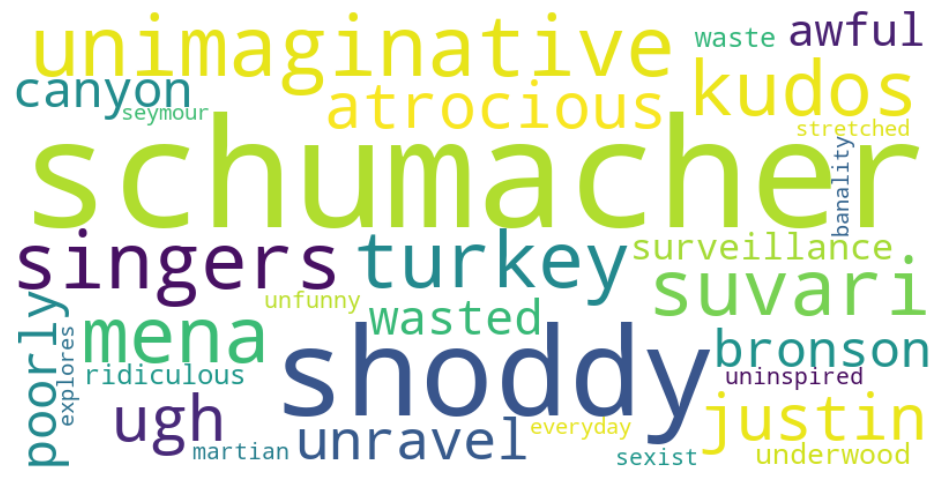

In [43]:

# Create a dictionary with word weights
word_weights = nb_word_weights

# Create a WordCloud object with the desired settings
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_font_size=150, relative_scaling=0.5, prefer_horizontal=0.7).generate_from_frequencies(word_weights)

# Plot the WordCloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

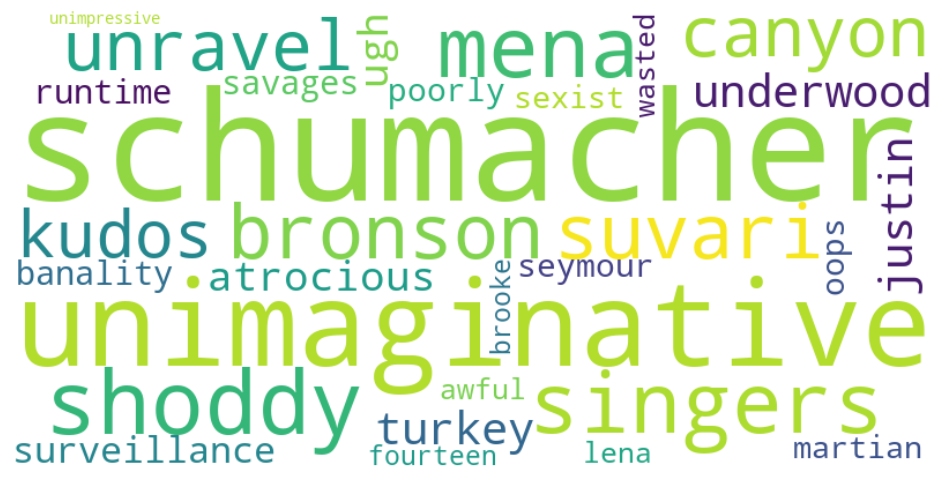

In [44]:

# Create a dictionary with word weights
word_weights = max_word_weights

# Create a WordCloud object with the desired settings
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_font_size=150, relative_scaling=0.5, prefer_horizontal=0.7).generate_from_frequencies(word_weights)

# Plot the WordCloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [45]:
# create an empty dictionary to store word frequencies
nb_word_freq = {}

# loop through the corpus
for word in words_no_stopwords:
    # check if the word is in nb_words
    if word in nb_words:
        # if the word is already in the dictionary, increment the frequency count
        if word in nb_word_freq:
            nb_word_freq[word] += 1
        # if the word is not in the dictionary, add it with a frequency count of 1
        else:
            nb_word_freq[word] = 1

# print the word frequency table
for word, freq in nb_word_freq.items():
    print(f"{word}: {freq}")



unravel: 9
kudos: 21
wasted: 118
stretched: 19
poorly: 94
awful: 132
sexist: 14
bronson: 20
singers: 10
seymour: 8
underwood: 11
turkey: 40
martian: 25
surveillance: 10
schumacher: 57
ridiculous: 140
waste: 143
everyday: 32
banality: 7
unfunny: 88
uninspired: 40
unimaginative: 13
explores: 24
canyon: 10
justin: 21
mena: 13
suvari: 19
shoddy: 11
atrocious: 19
ugh: 18


In [46]:
nb_freq = pd.DataFrame(list(nb_word_freq.items()), columns=['Words', 'NB Freq'])
nb_freq.head()

,Words,NB Freq
0,unravel,9
1,kudos,21
2,wasted,118
3,stretched,19
4,poorly,94


In [47]:
# create an empty dictionary to store word frequencies
max_word_freq = {}

# loop through the corpus
for word in words_no_stopwords:
    # check if the word is in nb_words
    if word in max_words:
        # if the word is already in the dictionary, increment the frequency count
        if word in max_word_freq:
            max_word_freq[word] += 1
        # if the word is not in the dictionary, add it with a frequency count of 1
        else:
            max_word_freq[word] = 1

# print the word frequency table
for word, freq in max_word_freq.items():
    print(f"{word}: {freq}")



unravel: 9
kudos: 21
runtime: 8
wasted: 118
poorly: 94
awful: 132
sexist: 14
bronson: 20
singers: 10
seymour: 8
underwood: 11
brooke: 13
turkey: 40
martian: 25
savages: 8
unimpressive: 7
surveillance: 10
schumacher: 57
banality: 7
lena: 9
unimaginative: 13
canyon: 10
oops: 8
fourteen: 6
justin: 21
mena: 13
suvari: 19
shoddy: 11
atrocious: 19
ugh: 18


In [48]:
max_freq = pd.DataFrame(list(max_word_freq.items()), columns=['Words', 'Max Freq'])
max_freq.head()

,Words,Max Freq
0,unravel,9
1,kudos,21
2,runtime,8
3,wasted,118
4,poorly,94


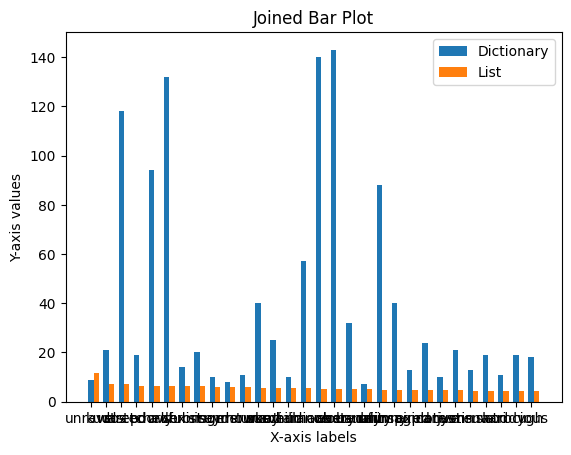

In [49]:
import matplotlib.pyplot as plt

# Define the dictionary and list
my_dict = nb_word_freq
my_list = nb_weights

# Get the x values (keys from the dictionary)
x = list(my_dict.keys())

# Get the y values (values from the dictionary and the list)
y1 = list(my_dict.values())
y2 = my_list

# Set the width of each bar
bar_width = 0.35

# Create the plot
fig, ax = plt.subplots()
ax.bar(x, y1, width=bar_width, label='Dictionary')
ax.bar([i + bar_width for i in range(len(x))], y2, width=bar_width, label='List')

# Add some labels and titles
ax.set_xlabel('X-axis labels')
ax.set_ylabel('Y-axis values')
ax.set_title('Joined Bar Plot')
ax.legend()

# Display the plot
plt.show()


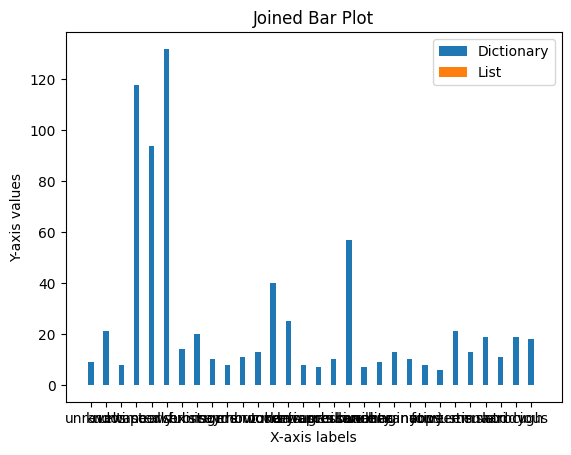

In [50]:
import matplotlib.pyplot as plt

# Define the dictionary and list
my_dict = max_word_freq
my_list = max_weights



# Get the x values (keys from the dictionary)
x = list(my_dict.keys())

# Get the y values (values from the dictionary and the list)
y1 = list(my_dict.values())
y2 = my_list

# Set the width of each bar
bar_width = 0.35

# Create the plot
fig, ax = plt.subplots()
ax.bar(x, y1, width=bar_width, label='Dictionary')
ax.bar([i + bar_width for i in range(len(x))], y2, width=bar_width, label='List')

# Add some labels and titles
ax.set_xlabel('X-axis labels')
ax.set_ylabel('Y-axis values')
ax.set_title('Joined Bar Plot')
ax.legend()

# Display the plot
plt.show()


In [51]:

df1 = pd.DataFrame({'Words': nb_words, 'NB Weights': nb_weights, 'NB Labs': nb_labs})
df2 = pd.DataFrame({'Words': max_words, 'MAX Weights': max_weights, 'MAX Labs': max_labs})

print(df1)
print(df2)


            Words  NB Weights NB Labs
0      schumacher        11.6     neg
1          shoddy         7.0     neg
2   unimaginative         7.0     neg
3         singers         6.3     pos
4            mena         6.3     neg
5          suvari         6.3     neg
6          turkey         6.3     neg
7           kudos         6.2     pos
8       atrocious         5.8     neg
9          justin         5.8     neg
10            ugh         5.8     neg
11        unravel         5.7     pos
12        bronson         5.7     neg
13         canyon         5.7     neg
14         poorly         5.6     neg
15         wasted         5.2     neg
16          awful         5.0     neg
17   surveillance         5.0     neg
18      underwood         5.0     neg
19     ridiculous         4.9     neg
20          waste         4.8     neg
21     uninspired         4.7     neg
22        unfunny         4.6     neg
23        martian         4.6     neg
24         sexist         4.6     neg
25       eve

In [52]:
# join the dataframes by column using outer join
df3 = pd.merge(df1, df2, on='Words', how='outer')
df4 = pd.merge(nb_freq, max_freq, on='Words', how='outer')
df5 = pd.merge(df3, df4, on='Words', how='outer')
df5 #All words

,Words,NB Weights,NB Labs,MAX Weights,MAX Labs,NB Freq,Max Freq
0,schumacher,11.6,neg,-0.014,pos,57.0,57.0
1,shoddy,7.0,neg,-0.011,pos,11.0,11.0
2,unimaginative,7.0,neg,-0.011,pos,13.0,13.0
3,singers,6.3,pos,-0.010,neg,10.0,10.0
4,mena,6.3,neg,-0.010,pos,13.0,13.0
5,suvari,6.3,neg,-0.010,pos,19.0,19.0
6,turkey,6.3,neg,-0.009,pos,40.0,40.0
7,kudos,6.2,pos,-0.009,neg,21.0,21.0
8,atrocious,5.8,neg,-0.009,pos,19.0,19.0
9,justin,5.8,neg,-0.009,pos,21.0,21.0


In [53]:
df5.to_csv('mydata.csv', index=False)


In [54]:
df3 = pd.merge(df1, df2, on='Words', how='inner')
df4 = pd.merge(nb_freq, max_freq, on='Words', how='inner')
df6 = pd.merge(df3, df4, on='Words', how='inner')
df6 #Common words

,Words,NB Weights,NB Labs,MAX Weights,MAX Labs,NB Freq,Max Freq
0,schumacher,11.6,neg,-0.014,pos,57,57
1,shoddy,7.0,neg,-0.011,pos,11,11
2,unimaginative,7.0,neg,-0.011,pos,13,13
3,singers,6.3,pos,-0.010,neg,10,10
4,mena,6.3,neg,-0.010,pos,13,13
5,suvari,6.3,neg,-0.010,pos,19,19
6,turkey,6.3,neg,-0.009,pos,40,40
7,kudos,6.2,pos,-0.009,neg,21,21
8,atrocious,5.8,neg,-0.009,pos,19,19
9,justin,5.8,neg,-0.009,pos,21,21


In [56]:
df6.to_csv('mydata2.csv', index=False)

In [57]:
df6

,Words,NB Weights,NB Labs,MAX Weights,MAX Labs,NB Freq,Max Freq
0,schumacher,11.6,neg,-0.014,pos,57,57
1,shoddy,7.0,neg,-0.011,pos,11,11
2,unimaginative,7.0,neg,-0.011,pos,13,13
3,singers,6.3,pos,-0.010,neg,10,10
4,mena,6.3,neg,-0.010,pos,13,13
5,suvari,6.3,neg,-0.010,pos,19,19
6,turkey,6.3,neg,-0.009,pos,40,40
7,kudos,6.2,pos,-0.009,neg,21,21
8,atrocious,5.8,neg,-0.009,pos,19,19
9,justin,5.8,neg,-0.009,pos,21,21


In [58]:
mynewdata = df6[['Words', 'NB Labs', 'NB Weights']]

In [59]:
mynewdata

,Words,NB Labs,NB Weights
0,schumacher,neg,11.6
1,shoddy,neg,7.0
2,unimaginative,neg,7.0
3,singers,pos,6.3
4,mena,neg,6.3
5,suvari,neg,6.3
6,turkey,neg,6.3
7,kudos,pos,6.2
8,atrocious,neg,5.8
9,justin,neg,5.8


In [60]:
import nltk
from nltk.corpus import movie_reviews
import networkx as nx
import matplotlib.pyplot as plt

# Get movie review documents from NLTK
docs = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

# Define list A of words to plot
A = mynewdata['Words'].values.tolist()

# Define list B of positive/negative words
C = mynewdata['NB Labs'].values.tolist()
B = {key: value for key, value in zip(A, C)}

# Define list Z of weights for nodes
Z = mynewdata['NB Weights'].values.tolist()
node_sizes = {key: value for key, value in zip(A, Z)}

# Create graph of co-occurring words in documents
G = nx.Graph()
for doc in docs:
    words = nltk.word_tokenize(doc)
    for i in range(len(words)):
        if words[i] in A:
            for j in range(i+1, len(words)):
                if words[j] in A:
                    if G.has_edge(words[i], words[j]):
                        G[words[i]][words[j]]['weight'] += 1
                    else:
                        G.add_edge(words[i], words[j], weight=1)

# Set node colors for list A words based on list B
node_colors = {}
for node in G.nodes():
    if node in A:
        if B[node] == 'pos':
            node_colors[node] = 'green'
        else:
            node_colors[node] = 'red'

# Draw network plot
pos = nx.spring_layout(G, k=0.5, iterations=50)

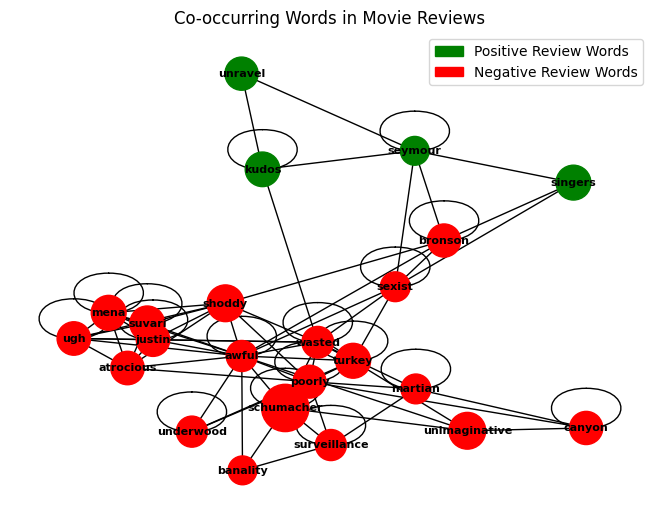

In [61]:
nx.draw(G, pos, node_color=[node_colors[node] for node in G.nodes()], with_labels=True, font_size=8, font_weight='bold', node_size=[node_sizes[node]*100 for node in G.nodes()])
legend_dict = {'Positive Review Words': 'green', 'Negative Review Words': 'red'}
plt.title("Co-occurring Words in Movie Reviews")
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for label, color in legend_dict.items()], labels=legend_dict.keys(), loc='upper right')
plt.show()

Network plots are used to visualize relationships between nodes (or entities) in a network. 

In this case, the nodes represent words, and edges between nodes represent the co-occurrence of words in movie reviews.

The colors of the nodes indicate whether the words are in positive or negative review. The size of the nodes is determined by the weights obtained using NB classifier. A larger node size indicates a higher weight, which could correspond to a higher importance of the word.

With this information, we can interpret the plot by looking at clusters or groups of nodes that are densely connected by edges. These clusters represent topics or themes that are common in movie reviews. We can also look at individual nodes and their connections to other nodes to identify important or influential words in the reviews.